# 1探索数据

In [60]:
import numpy as np
import pandas as pd

# 读取数据
train = pd.read_csv('data/pfm_train.csv')
test = pd.read_csv('data/pfm_test.csv')
print('train size:{}'.format(train.shape))
print('test size:{}'.format(test.shape))
# 缺失值查看
print('是否有缺失值',train.isnull().any().any())

train size:(1100, 31)
test size:(350, 30)
是否有缺失值 False


## 1.1 数据分析

In [61]:
# EmployeeNumber为员工ID，将其删除
train.drop(['EmployeeNumber'],axis=1,inplace=True)
test.drop(['EmployeeNumber'],axis=1,inplace=True)
# 将Attrition(该字段为标签)移至最后,方便索引
Attrition = train['Attrition']
train.drop(['Attrition'],axis=1,inplace=True)
train.insert(0,'Attrition',Attrition)

### 使用Pycharts从个维度上离职人数以及离职率进行分析

In [62]:
from pyecharts import Bar,Line,Grid
from pyecharts import Overlap

# 通过图表分析，那些因素是主要影响员工离职的因素
def get_charts(train,col):
    data = train.groupby([col])['Attrition']
    data_sum = data.sum()     # 离职人数
    data_mean = data.mean()   # 离职率
    
    bar = Bar(col,title_pos='45%')
    bar.add('离职人数', data_sum.index, data_sum.values, mark_point = ['max'],
            yaxis_formatter =  '人', yaxis_max = 200 , legend_pos="40%", legend_orient="vertical", 
            legend_top="95%", bar_category_gap = '25%')
    line = Line()
    line.add('离职率',list(map(lambda x:str(x),data_mean.index)),
                        data_mean.values,mark_point=['max'],mark_line=['average']
            ,yaxis_max=0.8)
    overlap = Overlap(width=900,height=400)
    overlap.add(bar)
    overlap.add(line,is_add_yaxis=True,yaxis_index=1)
    return overlap

from pyecharts import Page
page = Page()
for col in train.columns[1:]:
    page.add(get_charts(train,col))
page.render('anais.html')

## 2数据处理，特征处理

In [63]:
# 在数据探索时，发现一些数据是单一的，进一步验证
single_value_feature = []
for col in train.columns:
    length = len(train[col].unique())
    if length == 1:
        single_value_feature.append(col)
print('单一特征为:',single_value_feature)
# 删除单一特征
train.drop(['Over18', 'StandardHours'],axis=1,inplace=True)
test.drop(['Over18', 'StandardHours'],axis=1,inplace=True)

单一特征为: ['Over18', 'StandardHours']


由于数据集中没有缺失值，这里不需要对缺失值做处理

## 2.3特征共线性处理

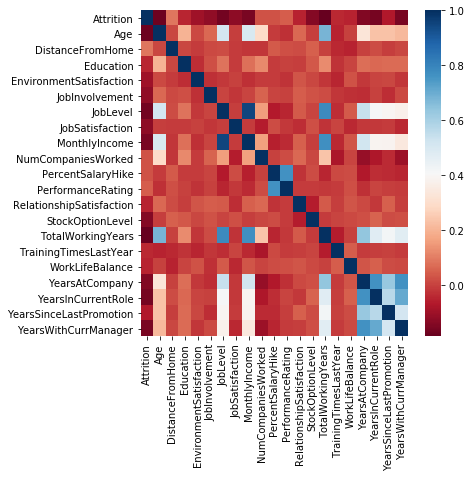

In [64]:
corr = train.corr()

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(6,6))
sns.heatmap(corr,cmap='RdBu')
# 发现MonthlyIncome 和JobLevel有很强的共线性删除一个
train.drop('JobLevel',axis=1,inplace=True)
test.drop('JobLevel',axis=1,inplace=True)

# 构建新特征

In [65]:
def creat(df):
    df['AgeEducation'] = df['Education']*100/df['Age']
    df['AgeMoneyly'] = df['MonthlyIncome']*df['JobInvolvement']//df['Age']
    df['IntoAge'] = df['Age']-df['TotalWorkingYears']
    df['Satisfaction'] = df['JobSatisfaction']+df['EnvironmentSatisfaction']+df['RelationshipSatisfaction']
creat(train)
creat(test)

In [51]:
# onehot 编码
train = pd.get_dummies(train)
test = pd.get_dummies(test)

## 数据落地

In [52]:
train.to_csv('data/train_solved.csv',index=False)
test.to_csv('data/test_solved.csv',index=False)
print('保存成功')

保存成功
